This notebook shows how anticorrelations are a reflection of conditioning on a common effect.

In [37]:
import numpy
import matplotlib.pyplot as plt

npts=100
gs=numpy.random.randn(npts)

data=numpy.random.randn(npts,3)
for d in range(data.shape[1]):
    data[:,d]=data[:,d]+gs
data=data-numpy.mean(data,0)

origcor=numpy.corrcoef(data.T)
print(origcor)

[[ 1.          0.41504959  0.46025907]
 [ 0.41504959  1.          0.51578101]
 [ 0.46025907  0.51578101  1.        ]]


In [39]:
meansig=numpy.mean(data,1)
meansig=meansig-numpy.mean(meansig)

r1_gsreg_beta=numpy.linalg.lstsq(meansig[:,numpy.newaxis],data[:,0])
r1_resid=data[:,0] - meansig*r1_gsreg_beta[0]

r2_gsreg_beta=numpy.linalg.lstsq(meansig[:,numpy.newaxis],data[:,1])
r2_resid=data[:,1] - meansig*r2_gsreg_beta[0]

residcor=numpy.corrcoef(r1_resid,r2_resid)[0,1]

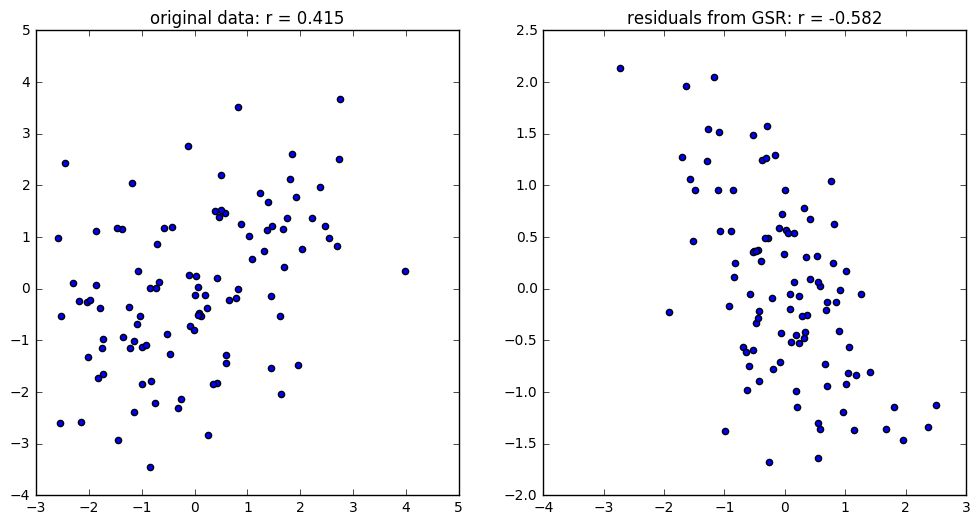

In [40]:
%matplotlib inline
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(data[:,0],data[:,1])
plt.title('original data: r = %0.3f'%origcor[0,1])
plt.subplot(1,2,2)  
plt.scatter(r1_resid,r2_resid)
plt.title('residuals from GSR: r = %0.3f'%residcor)

In [24]:
numpy.corrcoef(r1,r2)

array([[ 1.        ,  0.20160961],
       [ 0.20160961,  1.        ]])